Лабораторна робота №4 

Тема:Бінарна класифікація на основі даних Titanic


Мета:
Закріпити знання, отримані під час лекції з класифікації, застосовуючи різні моделі машинного навчання для прогнозування виживання пасажирів на основі набору даних Titanic. Практичне завдання спрямоване на розвиток навичок роботи з реальними даними, підготовки даних, побудови моделей та їх оцінки.


1. Підготовка середовища:


In [ ]:
import sklearn.metrics
! pip install pandas
! pip install numpy
! pip install matplotlib
! pip install sklearn
! pip install seaborn

2. Ознайомлення з даними:

In [86]:
import pandas as pd

# Завантаження даних
train_data = pd.read_csv('train.csv')

# Виведення перших 10 рядків
print("Перші 10 рядків даних:")
print(train_data.head(10))

# Базова статистика
print("\nБазова статистика даних:")
print(train_data.describe())

# Перевірка пропущених значень
print("\nПропущені значення у кожному стовпці:")
print(train_data.isnull().sum())


Перші 10 рядків даних:
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   
5            6         0       3   
6            7         0       1   
7            8         0       3   
8            9         1       3   
9           10         1       2   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   
5                                   Moran, Mr. James    male   NaN      0   
6                            McCarthy, Mr

3. Попередня обробка даних:

In [87]:
# Заповнення пропусків у стовпці 'Age' середнім значенням
train_data['Age'].fillna(train_data['Age'].mean(), inplace=True)

# Заповнення пропусків у стовпці 'Embarked' найпоширенішим значенням (модою)
train_data['Embarked'].fillna(train_data['Embarked'].mode()[0], inplace=True)

# One-Hot Encoding для змінних 'Sex' і 'Embarked'
train_data = pd.get_dummies(train_data, columns=['Sex', 'Embarked'], drop_first=True)

# Додавання ознаки 'FamilySize'
train_data['FamilySize'] = train_data['SibSp'] + train_data['Parch']

# Перевірка оброблених даних
print("Оброблені дані:")
print(train_data.head())


Оброблені дані:
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name   Age  SibSp  Parch  \
0                            Braund, Mr. Owen Harris  22.0      1      0   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  38.0      1      0   
2                             Heikkinen, Miss. Laina  26.0      0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  35.0      1      0   
4                           Allen, Mr. William Henry  35.0      0      0   

             Ticket     Fare Cabin  Sex_male  Embarked_Q  Embarked_S  \
0         A/5 21171   7.2500   NaN      True       False        True   
1          PC 17599  71.2833   C85     False       False       False   
2  STON/O2. 3101282   7.9250   NaN     False       False        True   
3            113803  5

C:\Users\kingg\AppData\Local\Temp\ipykernel_27224\1732597230.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_data['Age'].fillna(train_data['Age'].mean(), inplace=True)
C:\Users\kingg\AppData\Local\Temp\ipykernel_27224\1732597230.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as 

4. Поділ даних на тренувальну та тестову вибірки:

In [88]:
from sklearn.model_selection import train_test_split

# Вибір ознак і цільової змінної
X = train_data.drop(['PassengerId', 'Name', 'Ticket', 'Cabin', 'Survived'], axis=1)
y = train_data['Survived']

# Поділ даних на тренувальні та тестові вибірки (80% тренувальні, 20% тестові)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Розміри тренувальної та тестової вибірки:")
print(f"Тренувальні дані: {X_train.shape}, Тестові дані: {X_test.shape}")


Розміри тренувальної та тестової вибірки:
Тренувальні дані: (712, 9), Тестові дані: (179, 9)


5. Побудова моделей:

In [96]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

# Побудова моделей:
# DecisionTreeClassifier
dt_clf = DecisionTreeClassifier(random_state=42)
dt_clf.fit(X_train, y_train)
dt_pred = dt_clf.predict(X_test)

# RandomForestClassifier
rf_clf = RandomForestClassifier(random_state=42)
rf_clf.fit(X_train, y_train)
rf_pred = rf_clf.predict(X_test)

# LogisticRegression
lr_clf = LogisticRegression(max_iter=1500, random_state=42)
lr_clf.fit(X_train, y_train)
lr_pred = lr_clf.predict(X_test)

# Оцінка моделей:
def stats(real_data, pred_data, method_name):
    accuracy = accuracy_score(real_data, pred_data)
    precision = precision_score(real_data, pred_data)
    recall = recall_score(real_data, pred_data)
    f1 = f1_score(real_data, pred_data)
    
    print(f"{method_name} Model Evaluation:\n"
          f"Accuracy: {accuracy:.4f}\n"
          f"Precision: {precision:.4f}\n"
          f"Recall: {recall:.4f}\n"
          f"F1 Score: {f1:.4f}\n"
          "--------------------------------------\n")

# Виведення результатів для кожної моделі:
stats(y_test, dt_pred, "Decision Tree")
stats(y_test, rf_pred, "Random Forest")
stats(y_test, lr_pred, "Logistic Regression")


Decision Tree Model Evaluation:
Accuracy: 0.7821
Precision: 0.7397
Recall: 0.7297
F1 Score: 0.7347
--------------------------------------

Random Forest Model Evaluation:
Accuracy: 0.8212
Precision: 0.8088
Recall: 0.7432
F1 Score: 0.7746
--------------------------------------

Logistic Regression Model Evaluation:
Accuracy: 0.8101
Precision: 0.7857
Recall: 0.7432
F1 Score: 0.7639
--------------------------------------



6. Оцінка результатів:

In [67]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Функція для оцінки моделей
def evaluate_model(y_test, y_pred):
    return {
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred),
        'F1-score': f1_score(y_test, y_pred)
    }

log_reg_metrics = evaluate_model(y_test, y_pred_log_reg)
tree_metrics = evaluate_model(y_test, y_pred_tree)
forest_metrics = evaluate_model(y_test, y_pred_forest)

print("Логістична регресія:", log_reg_metrics)
print("Дерева рішень:", tree_metrics)
print("Випадкові ліси:", forest_metrics)


Логістична регресія: {'Accuracy': 0.8100558659217877, 'Precision': np.float64(0.7857142857142857), 'Recall': np.float64(0.7432432432432432), 'F1-score': np.float64(0.7638888888888888)}
Дерева рішень: {'Accuracy': 0.7821229050279329, 'Precision': np.float64(0.7397260273972602), 'Recall': np.float64(0.7297297297297297), 'F1-score': np.float64(0.7346938775510204)}
Випадкові ліси: {'Accuracy': 0.8212290502793296, 'Precision': np.float64(0.8088235294117647), 'Recall': np.float64(0.7432432432432432), 'F1-score': np.float64(0.7746478873239436)}


7. Побудова матриці плутанини та ROC-кривих:

Дерева рішень:
Матриця плутанини:
 [[86 19]
 [20 54]]


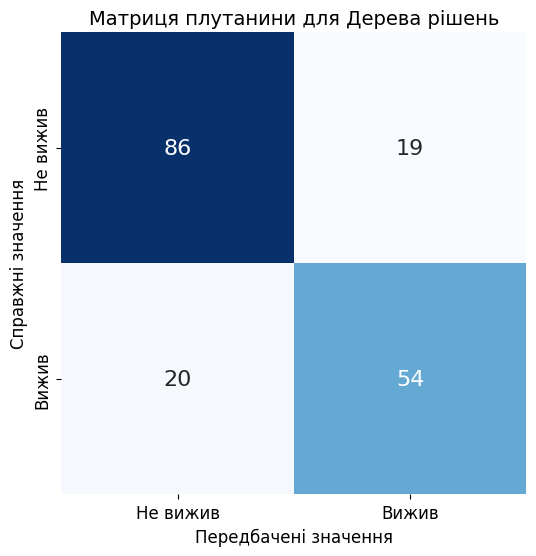

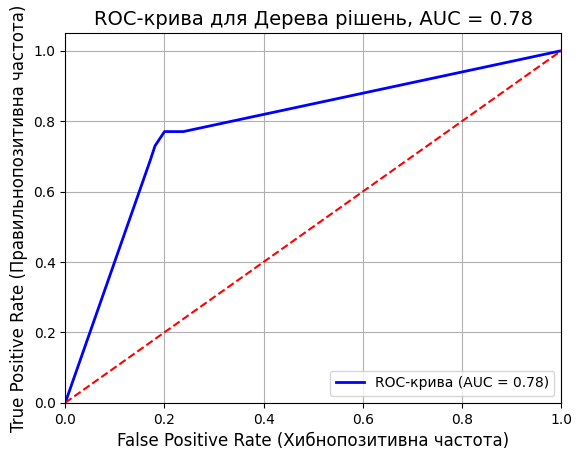

--------------------------------------------------------------------------
Випадкові ліси:
Матриця плутанини:
 [[92 13]
 [19 55]]


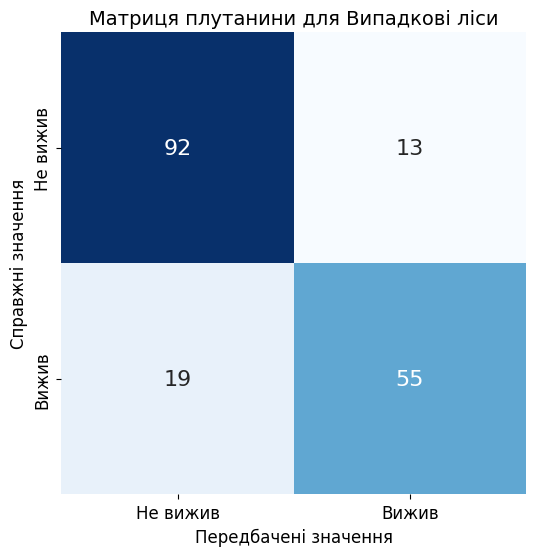

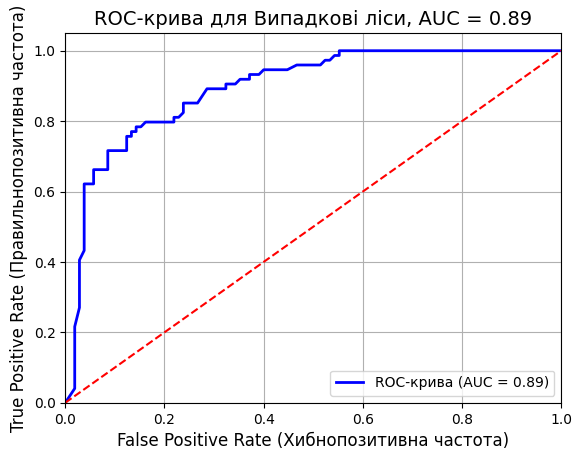

--------------------------------------------------------------------------
Логістична регресія:
Матриця плутанини:
 [[90 15]
 [19 55]]


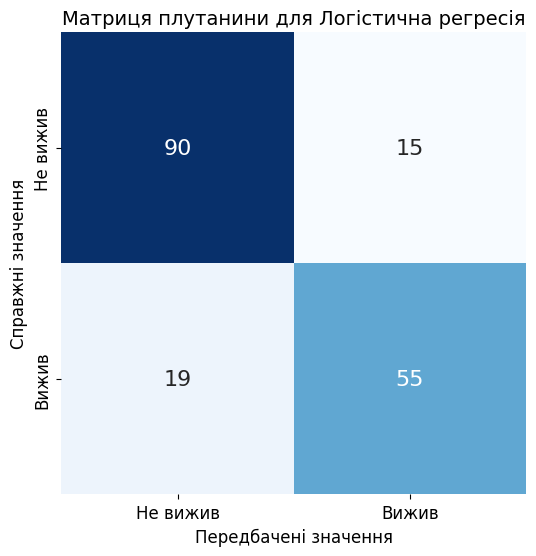

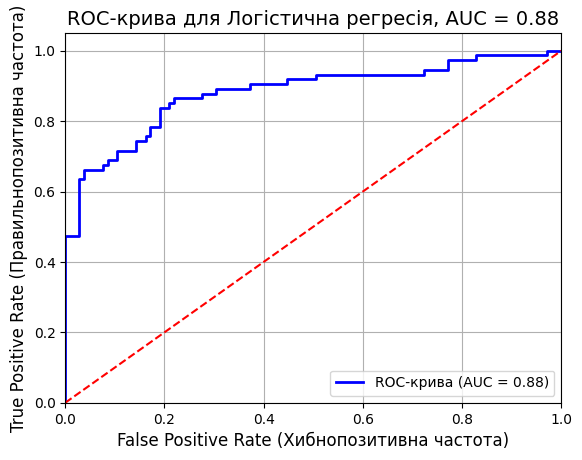

--------------------------------------------------------------------------


In [94]:
from sklearn.metrics import confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns

def result_grading(real_data, pred_data, pred_prob, method_name):
    # Побудова матриці плутанини
    confusion_mx = confusion_matrix(real_data, pred_data)
    print(f"{method_name}:\nМатриця плутанини:\n", confusion_mx)
    
    # Візуалізація матриці плутанини
    plt.figure(figsize=(6, 6))
    sns.heatmap(confusion_mx, annot=True, fmt='d', cmap='Blues', cbar=False, annot_kws={"size": 16})
    plt.title(f'Матриця плутанини для {method_name}', fontsize=14)
    plt.ylabel('Справжні значення', fontsize=12)
    plt.xlabel('Передбачені значення', fontsize=12)
    plt.xticks(ticks=[0.5, 1.5], labels=["Не вижив", "Вижив"], fontsize=12)
    plt.yticks(ticks=[0.5, 1.5], labels=["Не вижив", "Вижив"], fontsize=12)
    plt.show()

    # Побудова ROC-кривої
    fpr, tpr, thresholds = roc_curve(real_data, pred_prob)
    roc_auc = auc(fpr, tpr)
    
    # Візуалізація ROC-кривої
    plt.figure(facecolor='white')
    plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC-крива (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # Лінія випадкових передбачень
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate (Хибнопозитивна частота)', fontsize=12)
    plt.ylabel('True Positive Rate (Правильнопозитивна частота)', fontsize=12)
    plt.title(f'ROC-крива для {method_name}, AUC = {roc_auc:.2f}', fontsize=14)
    plt.legend(loc="lower right")
    plt.grid(True)
    plt.show()
    
    print("--------------------------------------------------------------------------")

# Приклад використання для моделей:
result_grading(y_test, y_pred_tree, tree.predict_proba(X_test)[:, 1], "Дерева рішень")
result_grading(y_test, y_pred_forest, forest.predict_proba(X_test)[:, 1], "Випадкові ліси")
result_grading(y_test, y_pred_log_reg, log_reg.predict_proba(X_test)[:, 1], "Логістична регресія")


8. Порівняння моделей

In [97]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

# Побудова моделей:
# DecisionTreeClassifier
dt_clf = DecisionTreeClassifier(random_state=42)
dt_clf.fit(X_train, y_train)
dt_pred = dt_clf.predict(X_test)

# RandomForestClassifier
rf_clf = RandomForestClassifier(random_state=42)
rf_clf.fit(X_train, y_train)
rf_pred = rf_clf.predict(X_test)

# LogisticRegression
lr_clf = LogisticRegression(max_iter=1500, random_state=42)
lr_clf.fit(X_train, y_train)
lr_pred = lr_clf.predict(X_test)

# Функція для оцінки моделей
def model_metrics(real_data, pred_data):
    return {
        "Accuracy": accuracy_score(real_data, pred_data),
        "Precision": precision_score(real_data, pred_data),
        "Recall": recall_score(real_data, pred_data),
        "F1 Score": f1_score(real_data, pred_data)
    }

# Збір результатів
metrics = {
    "Decision Tree": model_metrics(y_test, dt_pred),
    "Random Forest": model_metrics(y_test, rf_pred),
    "Logistic Regression": model_metrics(y_test, lr_pred)
}

# Перетворення результатів у таблицю
metrics_df = pd.DataFrame(metrics).T

# Виведення таблиці
print("Порівняння моделей за метриками:")
print(metrics_df)


Порівняння моделей за метриками:
                     Accuracy  Precision    Recall  F1 Score
Decision Tree        0.782123   0.739726  0.729730  0.734694
Random Forest        0.821229   0.808824  0.743243  0.774648
Logistic Regression  0.810056   0.785714  0.743243  0.763889


9. Завдання з творчим підходом:

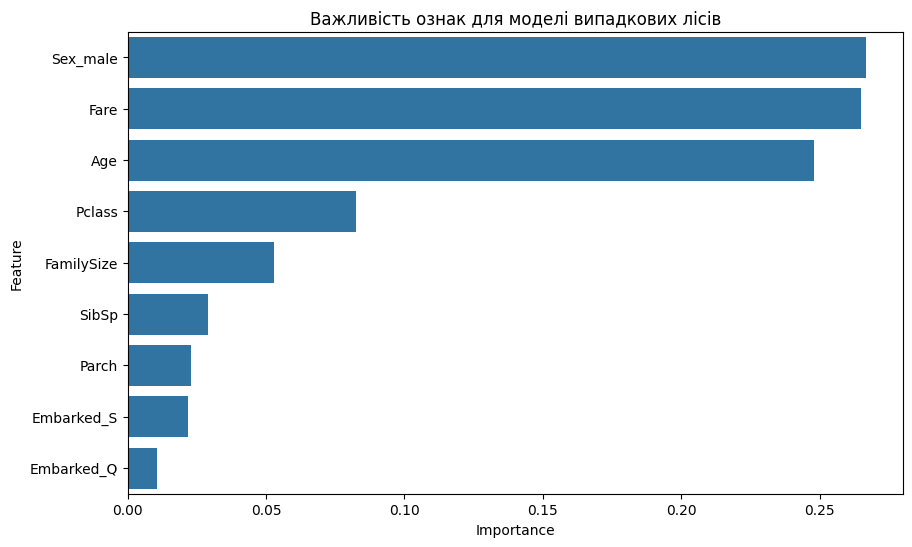

In [100]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Аналіз важливості ознак для випадкових лісів
importances = rf_clf.feature_importances_

# Створення таблиці важливості ознак
feature_importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)


# Візуалізація важливості ознак
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Важливість ознак для моделі випадкових лісів')
plt.show()


Більше за все на результати повпливали **стать пасажира** та **ціна квитка**. Для того, щоб модель була більш точною необхідно більше даних, наприклад: вага, ріст, стан здоров'я пасажира.